In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants as cnst
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   DARKGREEN = '\033[38;5;70m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   ORANGE = '\033[38;5;166m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   # For formatting print strings

# Calculate and propagate error for temp
T_arr = np.array([23,23,24,23,23,24,23]) + 273.15
T_av = np.mean(T_arr)
T_err = np.std(T_arr)
print(f"Average temp = {T_av:.3f} +/- {T_err:.3f} K")

Average temp = 296.436 +/- 0.452 K


In [2]:
def noise(func, sigma = 0):
    def noisy_func(*args, **kwargs):
        modified = func(*args, **kwargs)
        modified += np.random.normal(scale = sigma, size = len(modified))
        return modified
    return noisy_func

In [205]:
# Define Model Functions
def G(tau,N,D,r_0,z_0):
    """
    tau : Lag step
    N : effective number of particles
    D : diffusion constant
    r_0 : illuminated waist
    z_0 : iluminated height
    Returns -> Autocorrelation curve magnitude at given Tau
    """;
    return 1/(N) * 1/(1 + 4*D*tau/r_0**2) * 1/np.sqrt(1 + 4*D*tau/z_0**2)

def large_alpha_G(tau,N,tau_d):
    """
    tau : Lag step
    N : effective number of particles
    tau_D : characteristic time constant
    Returns -> Autocorrelation curve magnitude at given Tau
    """;
    return 1/N * 1/(1+tau/tau_d)

def G_for_V(tau,N,r_0,z_0):
    """
    tau : Lag step
    N : effective number of particles
    D : diffusion constant
    r_0 : illuminated waist
    z_0 : iluminated height
    Returns -> Autocorrelation curve magnitude at given Tau
    """;
    R = (500*10**(-9))/2
    nu = 0.9321*10**(-3)
    D = (cnst.Boltzmann*T_av/(6*np.pi))*1/(nu*R)
    return 1/(N) * 1/(1 + 4*D*tau/r_0**2) * 1/np.sqrt(1 + 4*D*tau/z_0**2)    

    
def G_3(tau,C,r_0,z_0):
    """
    tau : Lag step
    N : effective number of particles
    D : diffusion constant
    r_0 : illuminated waist
    z_0 : iluminated height
    Returns -> Autocorrelation curve magnitude at given Tau
    """;
    R = (500*10**(-9))/2
    nu = 0.9321*10**(-3)
    D = (cnst.Boltzmann*T_av/(6*np.pi))*1/(nu*R)

    V_eff = np.pi**(3/2)*(r_0**2)*z_0*1000 # in L
    n_term = V_eff*C

    return 1/(n_term) * 1/(1 + 4*D*tau/r_0**2) * 1/np.sqrt(1 + 4*D*tau/z_0**2)    

def G_4(tau,N,tau_D,alpha):
    A = 1/N
    B = 1/(1+tau/tau_D)
    C = 1/np.sqrt(1+tau/(tau_D*alpha**2))
    return A*B*C

'''
def G_for_V(tau,C,r_0,z_0):
    Temp = 296.436
    visc = 0.9321*10**(-3)
    R = (500*10**(-9))/2
    tau_D = estimate_tau_D(r_0,Temp,visc,R)
    """
    tau : Lag step
    C : solution concentration in beads per volume\
    r_0 : illuminated waist
    z_0 : iluminated height
    Returns -> Autocorrelation curve magnitude at given Tau
    """;
    V_eff = np.pi**(3/2)*(r_0**2)*z_0*1000 # in L
    n_term = V_eff*C
    return 1/(n_term) * 1/(1 + tau/tau_D) * 1/np.sqrt(1 + (tau/tau_D)*(r_0/z_0)**2)''';

def estimate_tau_D(r_0,Temp,viscosity,radius):
    num = r_0**2
    denom = cnst.Boltzmann*Temp
    return (num/denom)*6*np.pi*viscosity*radius

def estimate_concentration(R,density,dilution,stockPercent):
    V = ((4*np.pi*R**3)/3)*1000 # into L
    C0 = stockPercent*(1/V)*1/density
    Cf = C0/dilution
    return Cf



print(f"{estimate_concentration(500e-9,1.0,200,1):.3e}")

9.549e+12


# Part a) Constant and Chopped Intensities

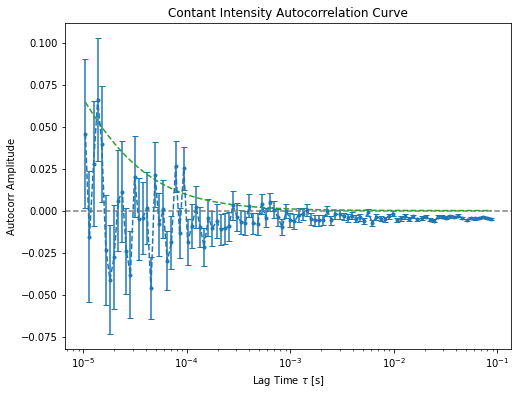

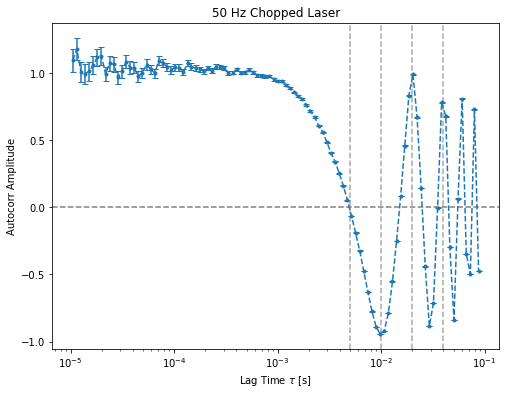

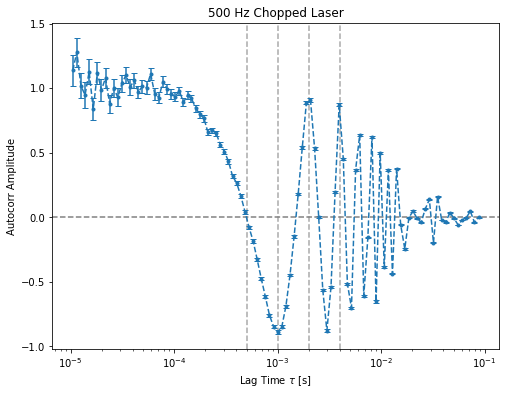

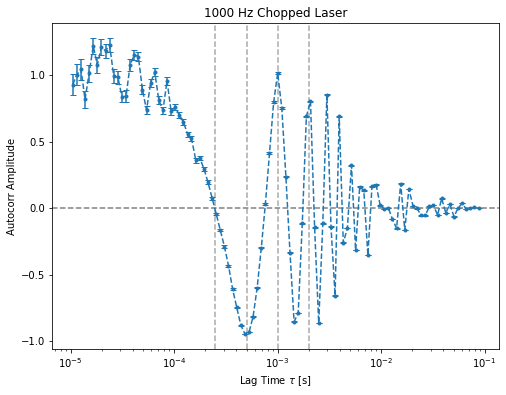

In [206]:
# Constant
filename = 'data/no_choppa.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
plt.axhline(0,ls='--',color = "Grey")
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "Contant Intensity Autocorrelation Curve");

N_init = 5
tauD_init = 0.000005
xspace = np.linspace(np.min(tau),np.max(tau),100000)
G_byEye = large_alpha_G(xspace,N_init,tauD_init)
plt.plot(xspace,G_byEye,'C2--',label = "Characteristic Fit By Eye (large alpha)")
plt.savefig("/work/notes/No_chopper.pdf",dpi = 300)

# Chopped 50 Hz
filename = '/work/data/a_chopper_50.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3,label = "Autocorr Data")
plt.axhline(0,ls='--',color = "Grey")
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "50 Hz Chopped Laser");
plt.savefig("/work/notes/50chopper.pdf",dpi = 300)

f = 50
T = 1/f
lineArr = [T,T/2,T/4,2*T]
for T_val in lineArr:
    plt.axvline(T_val,ls='--',color = "DarkGrey")

# Chopped 500 Hz
fig, ax = plt.subplots(figsize = (8,6))
filename = '/work/data/a_chopper_500.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)
f = 500
T = 1/f
lineArr = [T,T/2,T/4,2*T]
for T_val in lineArr:
    plt.axvline(T_val,ls='--',color = "DarkGrey")
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
plt.axhline(0,ls='--',color = "Grey")
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "500 Hz Chopped Laser");
plt.savefig("/work/notes/500chopper.pdf",dpi = 300)

# Chopped 1000 Hz
fig, ax = plt.subplots(figsize = (8,6))
filename = '/work/data/a_chopper_1000.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)
f = 1000
T = 1/f
lineArr = [T,T/2,T/4,2*T]
for T_val in lineArr:
    plt.axvline(T_val,ls='--',color = "DarkGrey")
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
plt.axhline(0,ls='--',color = "Grey")
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "1000 Hz Chopped Laser");
plt.savefig("/work/notes/1000chopper.pdf",dpi = 300)

# Part b) Determin $V_{\textrm{eff}}$ from known concentrations
We had problems in this section due to our experimental apparatus. The majority of the lab was spent troubleshooting the laser, spatial filter, objective, PMT, and samples. In the end we believe we have been able to characterize the effective volume of our trap./

### samples used:
| Sample        |    Stock Solution   | Dilution [fold]  |
|:---:|:---:|:---:|
| A      |   0.1% 100nm fps   | n/a |
| B      |   0.1% 100nm fps   | 500 |
| C      |   0.1% 100nm fps   | 200 |
| D      |   0.1% 100nm fps   | 100 |
| E      |   0.1% 100nm fps   | 50 |
| F      |   0.1% 100nm fps   | 10 |
| G      |   0.1% 100nm fps   | 3 |
| H      |   0.1% 100nm fps   | 20 |
| I      |   0.1% 100nm fps*  | 10 |
| J      |   0.1% 100nm fps*   | 5000 |
| K      |   1.0%  20nm fps   | 10 |
| L      |   1.0% 500nm fps   | unknown |
| M      |   1.0% 500nm fps   | 100 |
| N      |   1.0% 500nm fps   | 10,000 |
| O      |   1.0% 500nm fps   | 200 |
| H$_2$0      | Distilled Water | n/a |
| R6G      | Rhodamine Dye | n/a |

\* Using a fresh stock solution.

Characteristic curve from diluted samples of 0.1%$\frac{\textrm{w}}{\textrm{v}}$ fps. Fit characteristic curve G($\tau$) to extract effective volume

Note the small ampltidue and quick decau to zero, this curve is negligibly small with noise dominating at the low tau.
The oscillations in low tau are most likely due to the laser source.
Still large noise dominating at low tau (partialy due to shorter data set), however the oscillations of the laser no
longer dominate.


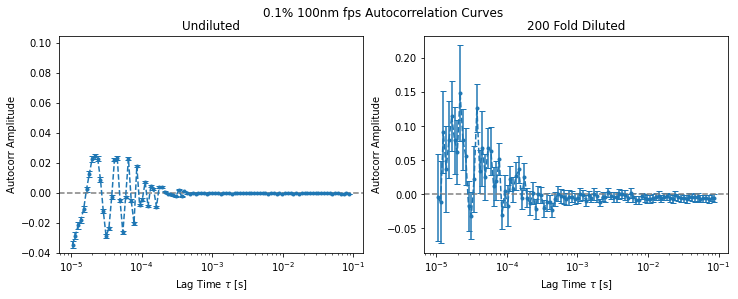

In [5]:
# Sample A & C (Undiluted and 200 fold fps)
fig = plt.figure(figsize = (12,4))
gs = fig.add_gridspec(1,2, hspace=0,wspace = 0.2)
ax1, ax2 = gs.subplots(sharex=True)
fig.suptitle("0.1% 100nm fps Autocorrelation Curves")

# Sample A
filename = '/work/data/trial2_pure_fps.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)
ax1.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
ax1.axhline(0,ls='--',color = "Grey")
ax1.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "Undiluted", xscale = 'log',
        ylim = (-0.04,0.105));

# Sample B
filename = '/work/data/200fold_fps_1.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)
ax2.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
ax2.axhline(0,ls='--',color = "Grey")
ax2.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "200 Fold Diluted", xscale = 'log');

print("Note the small ampltidue and quick decau to zero, this curve is negligibly small with noise dominating at the low tau.\nThe oscillations in low tau are most likely due to the laser source.")
print("Still large noise dominating at low tau (partialy due to shorter data set), however the oscillations of the laser no\nlonger dominate.")

We can see a clear autocorrelation curve, however since it ran for a long period of time
and the laser dropped in intensity since the begining we are not sure if this is due to
the particles diffusing or laser intensity dropping. Note the very low amplitude compared 
to error bars. This is a signal we need a lower concentration to reduce Neff.


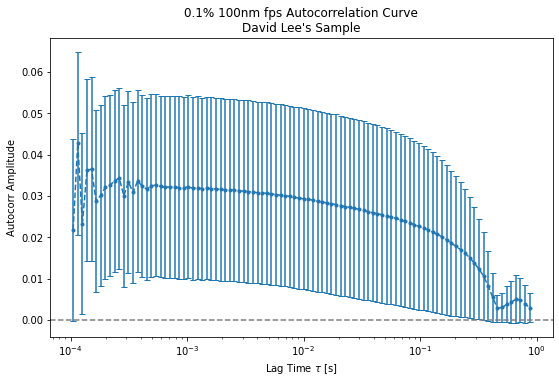

In [6]:
# Plot davids run from Intrasession IV - Unknown solution
filename = '/work/data/DavidRun.lvm'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (9,5.5))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
plt.axhline(0,ls='--',color = "Grey")
ax.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "0.1% 100nm fps Autocorrelation Curve\nDavid Lee's Sample", xscale = 'log');

print("We can see a clear autocorrelation curve, however since it ran for a long period of time\nand the laser dropped in intensity since the begining we are not sure if this is due to\nthe particles diffusing or laser intensity dropping. Note the very low amplitude compared \nto error bars. This is a signal we need a lower concentration to reduce Neff.")

Large Alpha Fit
N_eff	= 70.721 +/- 0.701 [beads]
tau_D	= 0.153 +/- 0.004 [s]
V_eff	= 97.202 +/- 0.963[pL]
Fit Statistics
 ChiSq = 217.38213805620228 +/- 14.0
 nu = 98
 Reduced Chi = 2.2181850822061455
7.276e+11


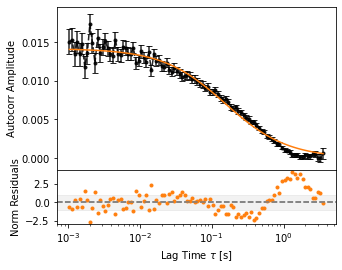

In [175]:
# Quick M Plot
filename = '/work/data/M_500_nm_40min.lvm'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig = plt.figure(figsize = (5,4))
gs = fig.add_gridspec(2,1, hspace=0,wspace = 0.05,height_ratios=[3, 1])
ax, axResid = gs.subplots(sharex=True)

min_x_i = 0
#remove the noise at the start
tau = tau[min_x_i:]
correlation = correlation[min_x_i:] - np.min(correlation[min_x_i:])
err = err[min_x_i:]
ax.errorbar(tau,correlation, yerr = err, fmt = 'k--.', capsize = 3, zorder = 0,alpha = 0.85)
plt.axhline(0,ls='--',color = "Grey")

ax.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",xscale = 'log');


print(color.ORANGE+"Large Alpha Fit"+color.END)
pOpt, pCov = curve_fit(large_alpha_G, tau, correlation, p0 = [2,1], sigma = err, absolute_sigma=True)
errVec = np.sqrt(np.diag(pCov))
print(f"N_eff\t= {pOpt[0]:.3f} +/- {errVec[0]:.3f} [beads]")
print(f"tau_D\t= {pOpt[1]:.3f} +/- {errVec[1]:.3f} [s]")

v_err = (errVec[0]/pOpt[0])*(pOpt[0]/conc)*10**12

print(f"V_eff\t= {(pOpt[0]/conc)*10**12:.3f} +/- {v_err:.3f}[pL]")
resApprox = large_alpha_G(tau,*pOpt) - correlation
normResApprox = resApprox/err
N = len(tau)
chiSq = np.sum(normResApprox**2)
nu = N  - len(pOpt) # points minus #fit parameters
chiSigma = np.sqrt(2*nu)
print("Fit Statistics\n ChiSq =",chiSq,"+/-",chiSigma)
print(" nu =",nu)
print(" Reduced Chi =",chiSq/nu)
ax.plot(tau, large_alpha_G(tau,*pOpt),"C1",label =r"Large $\alpha$ Model")

# plot residuals
axResid.axhspan(-1, 1,color = "Grey",alpha = 0.1)
axResid.plot(tau,normResApprox,'C1.',label = r"Large $\alpha$")
axResid.axhline(0,ls = "--",color = "Grey")
axResid.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Norm Residuals", xscale = 'log');
plt.savefig("/work/notes/preliminary_SampleM_fit.pdf",dpi = 300)
print(f"{conc:.3e}")

Large Alpha Fit
N_eff	= 37.407 +/- 0.539 [beads]
tau_D	= 0.181 +/- 0.006 [s]
V_eff	= 51.414 +/- 0.741[pL]
Fit Statistics
 ChiSq = 101.3541204439522 +/- 14.0
 nu = 98
 Reduced Chi = 1.0342257188158388

G Fit (Free D)
N_eff	= 38.885 +/- 0.649 [beads]
Diff	= 5.251 +/- 3717774.112 []
r_0	= 2.812 +/- 995212.188 [um]
z_0	= 2.812 +/- 996195.697 [um]
V_eff	= 0.105 [pL]
Fit Statistics
 ChiSq = 50.106881567283196 +/- 13.856406460551018
 nu = 96
 Reduced Chi = 0.5219466829925333

G Fit (Fixed D)
N_eff	= 38.883 +/- 0.646 [beads]
r_0	= 1.181 +/- 12.447 [um]
z_0	= 1.191 +/- 25.364 [um]
A) V_eff	= 0.008 +/- 0.186 [pL]
B) V_eff	= 53.443 +/- 0.888 [pL]
Fit Statistics
 ChiSq = 50.10737802820277 +/- 13.92838827718412
 nu = 97
 Reduced Chi = 0.516570907507245
3.638e+15

G Fit (Fixed D) 2
C_eff	= 4.145e+15 +/- 6.814e-25 [beads/L]
r_0	= 1.187 +/- 4.805 [um]
z_0	= 1.197 +/- 9.620 [um]
V_eff	= 0.008 [pL]
N_eff	= 0.033 [beads]
Fit Statistics
 ChiSq = 50.26554430982907 +/- 13.92838827718412
 nu = 97
 Reduced Ch

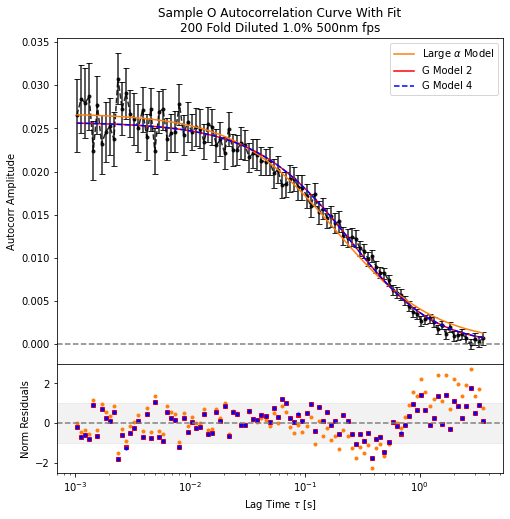

Large Alpha Fit
N_eff	= 70.721 +/- 0.701 [beads]
tau_D	= 0.153 +/- 0.004 [s]
V_eff	= 48.601 +/- 0.482[pL]
Fit Statistics
 ChiSq = 217.38213805620228 +/- 14.0
 nu = 98
 Reduced Chi = 2.2181850822061455

G Fit (Free D)
N_eff	= 73.629 +/- 0.866 [beads]
Diff	= 43.386 +/- 36408473.078 []
r_0	= -7.370 +/- 3092639.290 [um]
z_0	= 7.371 +/- 3092413.812 [um]
V_eff	= 1.887 [pL]
Fit Statistics
 ChiSq = 134.9398960729436 +/- 13.856406460551018
 nu = 96
 Reduced Chi = 1.405623917426496

G Fit (Fixed D)
N_eff	= 73.629 +/- 0.861 [beads]
r_0	= 1.078 +/- 18.423 [um]
z_0	= 1.084 +/- 37.390 [um]
A) V_eff	= 0.006 +/- 0.229 [pL]
B) V_eff	= 50.600 +/- 0.591 [pL]
Fit Statistics
 ChiSq = 134.9400256740332 +/- 13.92838827718412
 nu = 97
 Reduced Chi = 1.3911342852993114
7.276e+15

G Fit (Fixed D) 2
C_eff	= 1.048e+16 +/- 2.808e-27 [beads/L]
r_0	= 1.064 +/- 0.414 [um]
z_0	= 1.112 +/- 0.850 [um]
V_eff	= 0.006 [pL]
N_eff	= 0.062 [beads]
Fit Statistics
 ChiSq = 135.1878754994916 +/- 13.92838827718412
 nu = 97
 Reduc

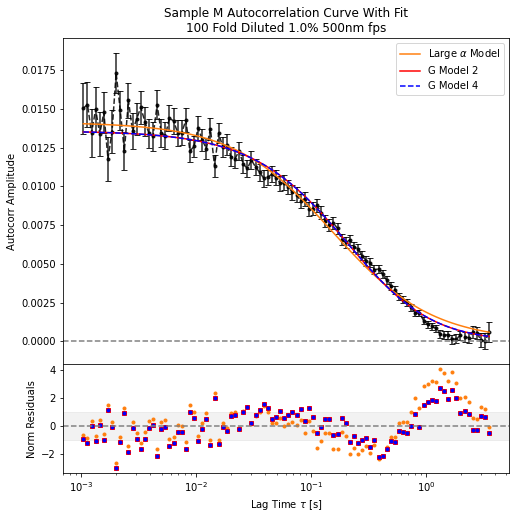

V_eff = 50.640920716112525 +/- 0.8602325267042622 [pL]


In [204]:
# Sample O - 200 fold dilution of 1.0% 500nm fps
def performFitsAndSave(filename="/work/data/O_500_nm_25min.lvm",
                        superTitle = "Sample O Autocorrelation Curve With Fit\n200 Fold Diluted 1.0% 500nm fps",
                        figName = "\work\notes\Hamish_OPlot.pdf",
                        R=(500*10**(-9))/2,
                        dilution = 200,
                        stockPerc = 0.01):
    tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)
    # Constants
    nu1 = 0.9321*10**(-3) # viscosity of water at this temp
    density = 1.05 # g/mL = kG/L

    # Find V_eff
    v_bead = (4/3)*np.pi*R**3 #m^3
    originalBeads_per_volume = (1/v_bead)*stockPerc
    beads_per_vol = originalBeads_per_volume/dilution #1/m^3
    #conc = beads_per_vol/1000 # beads/L
    #print("C1",conc)

    conc = estimate_concentration(R,density,dilution,stockPerc) # beads per L

    fig = plt.figure(figsize = (8,8))
    gs = fig.add_gridspec(2,1, hspace=0,wspace = 0.05,height_ratios=[3, 1])
    ax, axResid = gs.subplots(sharex=True)

    min_x_i = 0
    #remove the noise at the start
    tau = tau[min_x_i:]
    correlation = correlation[min_x_i:] - np.min(correlation[min_x_i:])
    err = err[min_x_i:]
    ax.errorbar(tau,correlation, yerr = err, fmt = 'k--.', capsize = 3, zorder = 0,alpha = 0.85)

    # Approximation Fit #########################################################################
    C = 6.02e-13
    print(color.ORANGE+"Large Alpha Fit"+color.END)
    pOpt, pCov = curve_fit(large_alpha_G, tau, correlation, p0 = [2,1], sigma = err, absolute_sigma=True)
    errVec = np.sqrt(np.diag(pCov))
    print(f"N_eff\t= {pOpt[0]:.3f} +/- {errVec[0]:.3f} [beads]")
    print(f"tau_D\t= {pOpt[1]:.3f} +/- {errVec[1]:.3f} [s]")
    v_err = (errVec[0]/pOpt[0])*(pOpt[0]/conc)*10**12
    print(f"V_eff\t= {(pOpt[0]/conc)*10**12:.3f} +/- {v_err:.3f}[pL]")
    resApprox = large_alpha_G(tau,*pOpt) - correlation
    normResApprox = resApprox/err
    N = len(tau)
    chiSq = np.sum(normResApprox**2)
    nu = N  - len(pOpt) # points minus #fit parameters
    chiSigma = np.sqrt(2*nu)
    print("Fit Statistics\n ChiSq =",chiSq,"+/-",chiSigma)
    print(" nu =",nu)
    print(" Reduced Chi =",chiSq/nu)
    ax.plot(tau, large_alpha_G(tau,*pOpt),"C1",label =r"Large $\alpha$ Model")

    # Full G fit ###############################################################################
    pOpt, pCov = curve_fit(G, tau, correlation, p0 = [77,1,5,10], sigma = err, absolute_sigma=True)

    errVec = np.sqrt(np.diag(pCov))
    print("\n"+color.DARKGREEN+"G Fit (Free D)"+color.END)
    print(f"N_eff\t= {pOpt[0]:.3f} +/- {errVec[0]:.3f} [beads]")
    print(f"Diff\t= {pOpt[1]:.3f} +/- {errVec[1]:.3f} []")
    print(f"r_0\t= {pOpt[2]:.3f} +/- {errVec[2]:.3f} [um]")
    print(f"z_0\t= {pOpt[3]:.3f} +/- {errVec[3]:.3f} [um]")
    V_eff = ((3*np.pi/2)*(pOpt[2]**2)*(pOpt[3]))*(10**(-6-6-6)) # m**3
    print(f"V_eff\t= {V_eff*1000*10**12:.3f} [pL]")

    resG = G(tau,*pOpt) - correlation
    normResG = resG/err
    N = len(tau)
    chiSq = np.sum(normResG**2)
    nu = N  - len(pOpt) # points minus #fit parameters
    chiSigma = np.sqrt(2*nu)
    print(color.UNDERLINE+"Fit Statistics"+color.END+"\n ChiSq =",chiSq,"+/-",chiSigma)
    print(" nu =",nu)
    print(" Reduced Chi =",chiSq/nu)

    #ax.plot(tau, G(tau,*pOpt),"C2",label ="G Model 1")

    # Second Full G Fit ###############################################################################
    N_init = estimate_concentration(R,density,dilution,stockPerc)*10**(-12) # beads per L * V_eff estimate
    r_0_init = 2000*10**(-9)
    z_0_init = 2000*10**(-9)

    pOpt, pCov = curve_fit(G_for_V, tau, correlation, p0 = [N_init,r_0_init,z_0_init], sigma = err, absolute_sigma=True,
                            bounds = ((0,0,0),(np.inf,np.inf,np.inf)))
    [N_ham,r_0_ham,z_0_ham] = pOpt
    [N_ham_err,r_0_ham_err,z_0_ham_err] = np.sqrt(np.diag(pCov))

    print("\n"+color.RED+"G Fit (Fixed D)"+color.END)
    print(f"N_eff\t= {N_ham:.3f} +/- {N_ham_err:.3f} [beads]")
    print(f"r_0\t= {r_0_ham*10**6:.3f} +/- {r_0_ham_err*10**6:.3f} [um]")
    print(f"z_0\t= {z_0_ham*10**6:.3f} +/- {z_0_ham_err*10**6:.3f} [um]")
    V_eff = (3*np.pi/2)*(r_0_ham**2)*(z_0_ham)
    V_err = np.sqrt((r_0_ham_err/r_0_ham)**2+(z_0_ham_err/z_0_ham)**2)*V_eff
    print(f"A) V_eff\t= {V_eff*1000*10**(12):.3f} +/- {V_err*1000*10**12:.3f} [pL]")
    V_eff = N_ham/conc
    V_err = (N_ham_err/N_ham)*V_eff
    print(f"B) V_eff\t= {V_eff*10**(12):.3f} +/- {V_err*10**12:.3f} [pL]")

    resUpdated = G_for_V(tau,*pOpt) - correlation
    normResUpdated = resUpdated/err
    N = len(tau)
    chiSq = np.sum(normResUpdated**2)
    nu = N  - len(pOpt) # points minus #fit parameters
    chiSigma = np.sqrt(2*nu)
    print(color.UNDERLINE+"Fit Statistics"+color.END+"\n ChiSq =",chiSq,"+/-",chiSigma)
    print(" nu =",nu)
    print(" Reduced Chi =",chiSq/nu)

    ax.plot(tau, G_for_V(tau,*pOpt),'-',color = "Red",label ="G Model 2")


    # Third Full G Fit ###############################################################################
    C_init = estimate_concentration(R,density,dilution,stockPerc)*5000 # beads per L
    print(f"{C_init:.3e}")
    r_0_init = 1000*10**(-9)
    z_0_init = 2200*10**(-9)

    pOpt, pCov = curve_fit(G_3, tau, correlation, p0 = [C_init,r_0_init,z_0_init], sigma = err, absolute_sigma=True,
                            bounds = ((0,0,0),(np.inf,np.inf,np.inf)))
    [C_ham,r_0_ham,z_0_ham] = pOpt
    [C_ham_err,r_0_ham_err,z_0_ham_err] = np.sqrt(np.diag(pCov))

    print("\n"+color.BLUE+"G Fit (Fixed D) 2"+color.END)
    print(f"C_eff\t= {C_ham:.3e} +/- {C_ham_err:.3e} [beads/L]")
    print(f"r_0\t= {r_0_ham*10**6:.3f} +/- {r_0_ham_err*10**6:.3f} [um]")
    print(f"z_0\t= {z_0_ham*10**6:.3f} +/- {z_0_ham_err*10**6:.3f} [um]")
    V_eff = (3*np.pi/2)*(r_0_ham**2)*(z_0_ham)
    print(f"V_eff\t= {V_eff*1000*10**(12):.3f} [pL]")
    print(f"N_eff\t= {V_eff*C_ham:.3f} [beads]")

    resG3 = G_3(tau,*pOpt) - correlation
    normResG3 = resG3/err
    N = len(tau)
    chiSq = np.sum(normResG3**2)
    nu = N  - len(pOpt) # points minus #fit parameters
    chiSigma = np.sqrt(2*nu)
    print(color.UNDERLINE+"Fit Statistics"+color.END+"\n ChiSq =",chiSq,"+/-",chiSigma)
    print(" nu =",nu)
    print(" Reduced Chi =",chiSq/nu)

    #ax.plot(tau, G_3(tau,*pOpt),'C4-.',label ="G Model 3")

    # Fourth Full G Fit ###############################################################################
    N_init = 100 # beads 
    tau_D_init = 0.3
    alpha_init = 2

    pOpt, pCov = curve_fit(G_4, tau, correlation, p0 = [N_init,tau_D_init,alpha_init], sigma = err, absolute_sigma=True)
    [N_opt,tau_D_opt,alpha_opt] = pOpt
    [N_opt_err,tau_D_opt_err,alpha_opt_err] = np.sqrt(np.diag(pCov))

    print("\n"+color.DARKCYAN+"G Fit (Fixed D) 3"+color.END)
    print(f"N_eff\t= {N_opt:.3f} +/- {N_opt_err:.3f} [beads]")
    print(f"tau_D\t= {tau_D_opt:.3f} +/- {tau_D_opt_err:.3f} [sec]")
    print(f"alpha\t= {alpha_opt:.3f} +/- {alpha_opt_err:.3f} [um/um]")
    V_eff = N_opt/conc
    V_err = (N_opt_err/N_opt)*V_eff
    print(f"V_eff\t= {V_eff*10**(12):.3f} +/- {V_err*10**12:.3f} [pL]")\

    resG4 = G_4(tau,*pOpt) - correlation
    normResG4 = resG4/err
    N = len(tau)
    chiSq = np.sum(normResG4**2)
    nu = N  - len(pOpt) # points minus #fit parameters
    chiSigma = np.sqrt(2*nu)
    print(color.UNDERLINE+"Fit Statistics"+color.END+"\n ChiSq =",chiSq,"+/-",chiSigma)
    print(" nu =",nu)
    print(" Reduced Chi =",chiSq/nu)

    ax.plot(tau, G_4(tau,*pOpt),'--',color = "Blue",label ="G Model 4")

    # Plotting details
    ax.axhline(0,ls='--',color = "Grey")
    ax.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",title = superTitle, xscale = 'log');
    ax.legend()

    # plot residuals
    axResid.axhspan(-1, 1,color = "Grey",alpha = 0.1)
    #axResid.axhspan(-3, 3,color = "Grey",alpha = 0.00)
    axResid.plot(tau,normResApprox,'C1.',label = r"Large $\alpha$")
    #axResid.plot(tau,normResG,'C2s',label = r"G Model 1",markersize = 4)
    axResid.plot(tau,normResUpdated,'s',color = "Red",label = r"G Model 2",markersize = 4)
    #axResid.plot(tau,normResG3,'C4.',label = r"G Model 3")
    axResid.plot(tau,normResG4,'.',color = "Blue",label = r"G Model 4")
    axResid.axhline(0,ls = "--",color = "Grey")
    axResid.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Norm Residuals", xscale = 'log');
    #plt.legend()
    plt.savefig(figName,dpi = 300)
    plt.show()

performFitsAndSave()
performFitsAndSave("/work/data/M_500_nm_40min.lvm",
                    "Sample M Autocorrelation Curve With Fit\n100 Fold Diluted 1.0% 500nm fps",
                    "\work\notes\Hamish_MPlot.pdf",
                    dilution = 100)

V = np.array([48.6,50.6,51.4,53.4])
Verr = np.array([0.5,0.6,0.7,0.9])
V_av = np.average(V,weights = 1/Verr)
V_averr = np.std(V)/np.sqrt(4)
print(f"V_eff = {V_av} +/- {V_averr} [pL]")


lmao

[38.88529872  2.65584311] [0.52370327 0.08093194]
[37.40706987  0.18117706] [0.53883084 0.0064797 ]


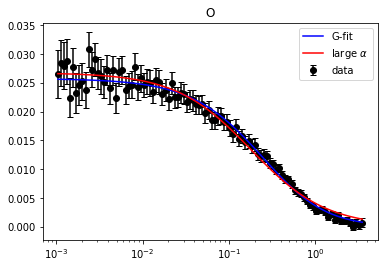

In [187]:
def comp_G(tau,N,B):
    """
    tau : Lag step
    N : effective number of particles
    tau_D : characteristic time constant
    Returns -> Autocorrelation curve magnitude at given Tau
    """;
    return 1/N * 1/(1+B*tau)**(3/2)

filename = '/work/data/O_500_nm_25min.lvm'
#filename = '/work/data/M_500_nm_40min.lvm'

tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)
correlation -= np.min(correlation)
pOpt, pCov = curve_fit(comp_G, tau, correlation, p0 = [77,2], sigma = err, absolute_sigma=True )


print(pOpt, np.sqrt(np.diag(pCov)))
plt.errorbar(tau, correlation, fmt = 'o', yerr = err, capsize=3, label = 'data', color ='k', zorder = 0)
plt.plot(tau, comp_G(tau, *pOpt), color= 'b', label = 'G-fit')
plt.title('O')

pOpt, pCov = curve_fit(large_alpha_G, tau, correlation, p0 = [77,2], sigma = err, absolute_sigma=True )
print(pOpt, np.sqrt(np.diag(pCov)))
plt.plot(tau, large_alpha_G(tau, *pOpt), color = 'r', label = 'large $\\alpha$')
plt.legend()
plt.xscale('log')
plt.savefig('notes/elliot_O')

[73.6291967   3.19463074] [0.67658711 0.07239685]
[70.72121863  0.15340951] [0.70071591 0.00403458]


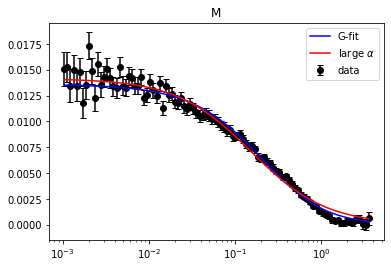

In [139]:
filename = '/work/data/M_500_nm_40min.lvm'
plt.title('M')
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)
correlation -= np.min(correlation)

pOpt, pCov = curve_fit(comp_G, tau, correlation, p0 = [77,2], sigma = err, absolute_sigma=True )


print(pOpt, np.sqrt(np.diag(pCov)))
plt.errorbar(tau, correlation, fmt = 'o', yerr = err, capsize=3, label = 'data', color ='k', zorder = 0)
plt.plot(tau, comp_G(tau, *pOpt), color= 'b', label = 'G-fit')

pOpt, pCov = curve_fit(large_alpha_G, tau, correlation, p0 = [77,2], sigma = err, absolute_sigma=True )
print(pOpt, np.sqrt(np.diag(pCov)))

plt.plot(tau, large_alpha_G(tau, *pOpt), color = 'r', label = 'large $\\alpha$')
plt.legend()
plt.xscale('log')
plt.savefig('notes/elliot_M')

Large Alpha Fit
N_eff	= 37.407 +/- 0.539 [beads]
tau_D	= 0.181 +/- 0.006 [s]
V_eff	= 25.707 +/- 0.370[pL]
Fit Statistics
 ChiSq = 101.3541204439522 +/- 14.0
 nu = 98
 Reduced Chi = 1.0342257188158388

G Fit (Free D)
N_eff	= 38.885 +/- 0.649 [beads]
Diff	= 5.251 +/- 3717774.112 []
r_0	= 2.812 +/- 995212.188 [um]
z_0	= 2.812 +/- 996195.697 [um]
V_eff	= 0.105 [pL]
Fit Statistics
 ChiSq = 50.106881567283196 +/- 13.856406460551018
 nu = 96
 Reduced Chi = 0.5219466829925333

G Fit (Fixed D)
N_eff	= 38.883 +/- 0.646 [beads]
r_0	= 1.181 +/- 11.775 [um]
z_0	= 1.191 +/- 24.008 [um]
A) V_eff	= 0.008 +/- 0.176 [pL]
B) V_eff	= 26.721 +/- 0.444 [pL]
Fit Statistics
 ChiSq = 50.10740687422036 +/- 13.92838827718412
 nu = 97
 Reduced Chi = 0.5165712048888697
7.276e+15

G Fit (Fixed D) 2
C_eff	= 5.207e+15 +/- 6.633e-28 [beads/L]
r_0	= 0.989 +/- 0.146 [um]
z_0	= 1.147 +/- 0.326 [um]
V_eff	= 0.005 [pL]
N_eff	= 0.028 [beads]
Fit Statistics
 ChiSq = 244.56167716391712 +/- 13.92838827718412
 nu = 97
 Reduced 

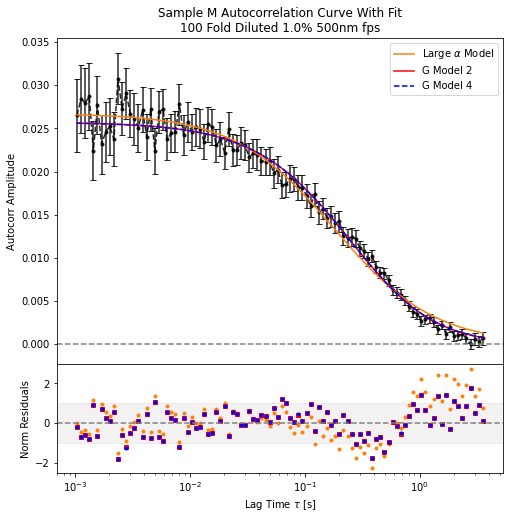

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a2a632c-fb71-4ebc-b3fb-2171f4c31db5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>